# Python for Data Science and Analysis 
## Exploratory Data Analysis and Visualization

## Objectives
* Write a program which uses seaborn to:
    * show univariate plots (eg., distplot)
    * show multivariate plots (eg., scatterplot)
 

# Visualisation

## How do I use pandas to plot?

Pandas has a `.plot` which you configure using its arguments (eg., `kind=hist`), this however *just uses* seaborn. 

In [1]:
import pandas as pd
ti = pd.read_csv('data/Titanic.csv')
ti.head(3)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


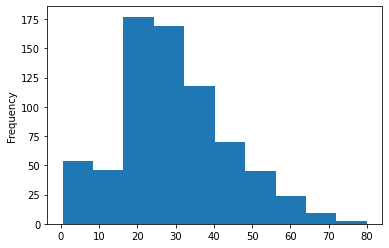

In [2]:
ti['age'].plot(kind='hist');

Often pandas doesn't choose the right plot, or the right dataseries... therefore it's often easier to go straight to using seaborn. 

## How do I use seaborn to visualize data?

In [3]:
import seaborn as sns

In [ ]:
dir(sns)

In [4]:
[name for name in dir(sns) if 'plot' in name]

['barplot',
 'boxenplot',
 'boxplot',
 'catplot',
 'countplot',
 'displot',
 'distplot',
 'dogplot',
 'ecdfplot',
 'factorplot',
 'histplot',
 'jointplot',
 'kdeplot',
 'lineplot',
 'lmplot',
 'miscplot',
 'pairplot',
 'palplot',
 'plotting_context',
 'pointplot',
 'regplot',
 'relplot',
 'residplot',
 'rugplot',
 'scatterplot',
 'stripplot',
 'swarmplot',
 'violinplot']

### Checks for emptiness and cleanse data

In [5]:
ti.isna().sum() #check for emptiness

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
ti.isna().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [ ]:
True + False

In [9]:
import numpy as np

In [10]:
np.NaN

nan

In [11]:
#replace NaNs in numerical fields with the mean values
ti['age']=ti['age'].fillna(ti['age'].mean())
# How can we fix the Future warning, and what does it mean?

In [12]:
ti.select_dtypes([float])

,age,fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [13]:
ti['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [15]:
# fill every column with its own most frequent value (mode)
ti = ti.apply(lambda col: col.fillna(col.value_counts().index[0]))

In [ ]:
def double(x):
    return x * 2

In [ ]:
double           (3)

In [ ]:
(lambda x: x * 2)(3)

In [16]:
ti.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

### Using Seaborn

There are two ways of using seaborn, you can either

* supply x (, y, etc.) as individual arguments
* OR: supply a *dataframe* and name the relevant columns

In [17]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15.0, 8.0]

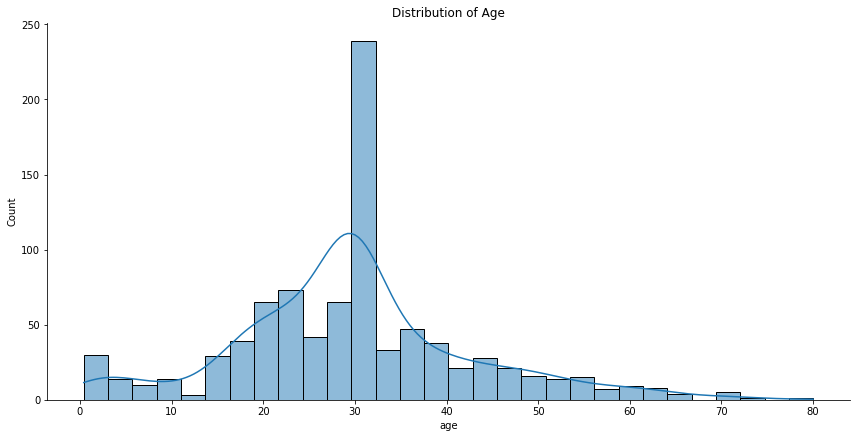

In [26]:
sns.displot(ti['age'], height=6, aspect = 2, kde=True);
# How can we fix the Future warning, and what does it mean?
plt.title("Distribution of Age");

##### What is the kde?

* approximation of the distribution using a linear combination of normal distributions

* further reading: https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation

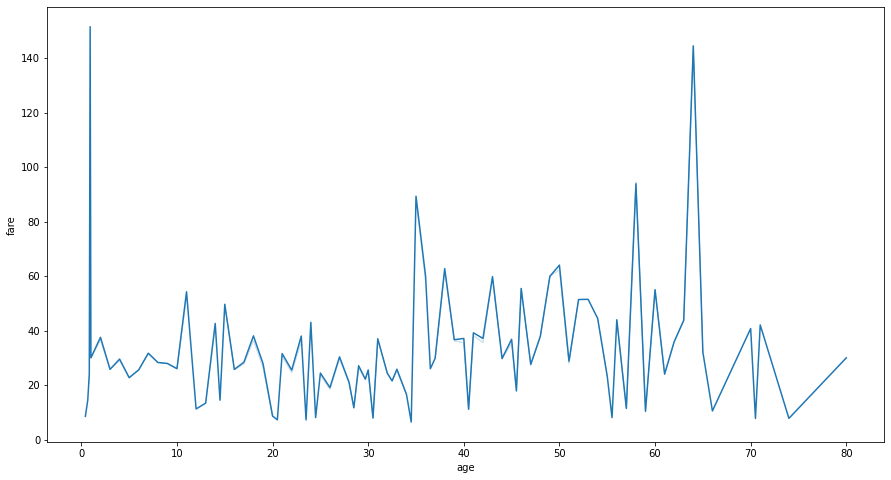

In [28]:
sns.lineplot(x=ti['age'], y=ti['fare'],ci=0);
# How can we fix the Future warning, and what does it mean?

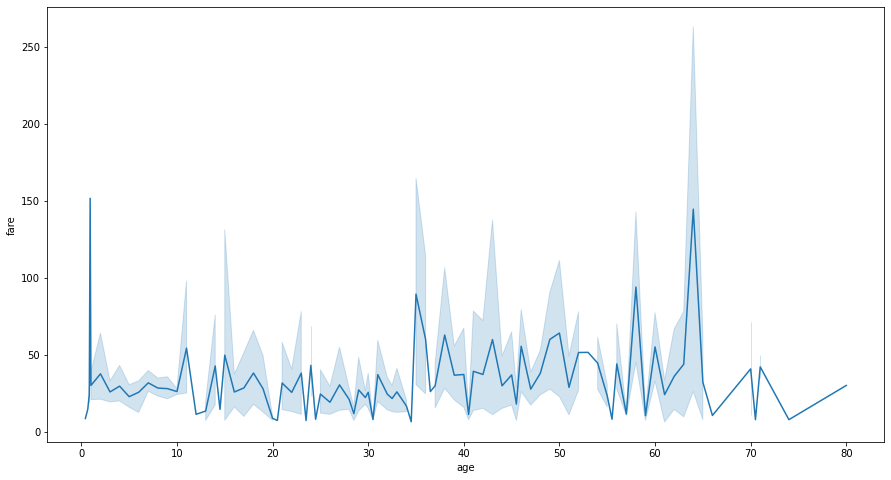

In [31]:
sns.lineplot(data=ti,
             x="age",
             y="fare");

## How do I use a dataframe with seaborn?

We set `data` to be the dataframe, and *name the columns* for `x` and `y`... 

In [ ]:
ti.info()

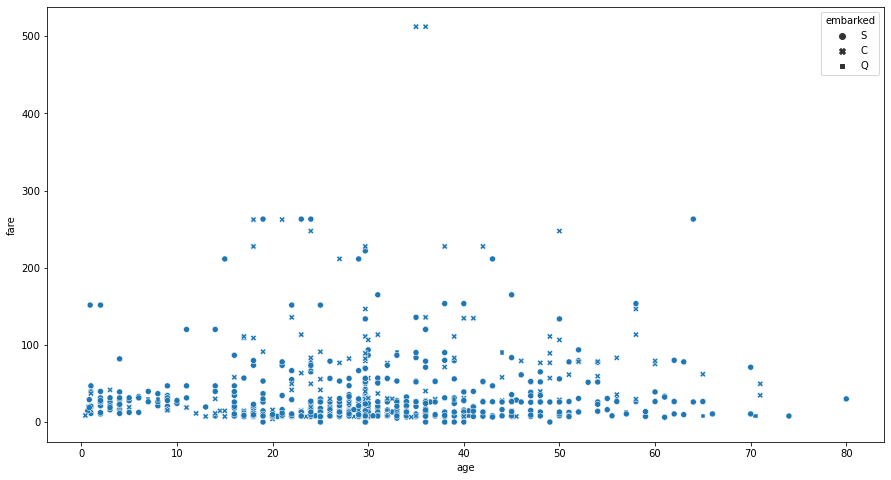

In [34]:
sns.scatterplot(data=ti,
                x='age',
                y='fare',
                style='embarked');
#plt.savefig("scatter.png")

## How do I create a distribution plot?

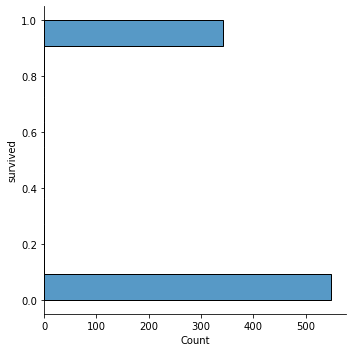

In [41]:
sns.displot(y=ti['survived'], kde=False);
# How can we fix the Future ,warning, and what does it mean?

Dealing with the future warnings of the last plot, note the difference in how the chart is made horizontal.

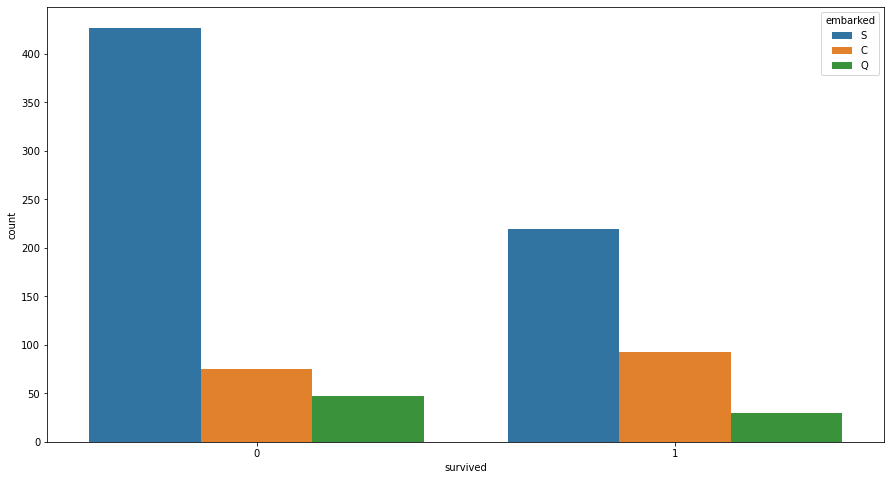

In [45]:
sns.countplot(data=ti,
              x='survived',
             hue='embarked');

## How do I create a violin plot?

The width of a violin plot is the frequency (ie., how common) a value is within some column... 

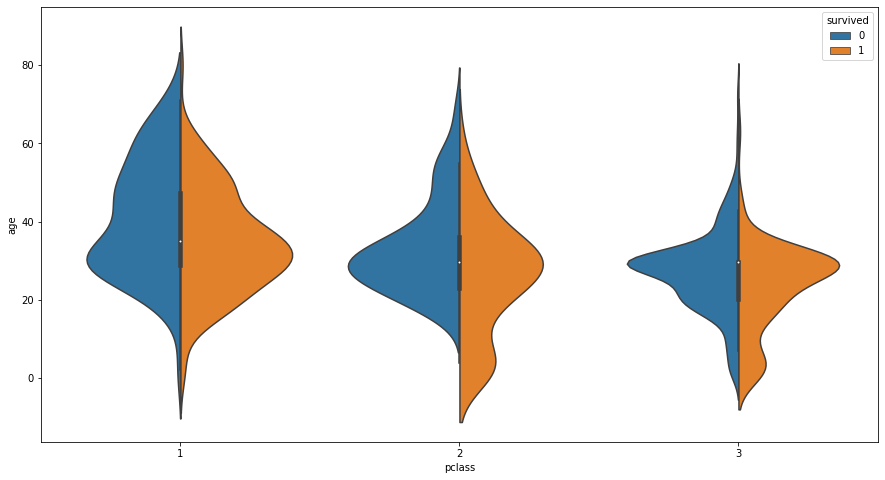

In [57]:
sns.violinplot(data=ti,
               y='age', 
               x='pclass', 
               hue='survived',
              split=True);
# How can we fix the Future warning, and what does it mean?

## How do I create a box plot?

Box plots show quarties (25th, 50th, 75th) and outliers. 

<AxesSubplot:xlabel='pclass', ylabel='age'>

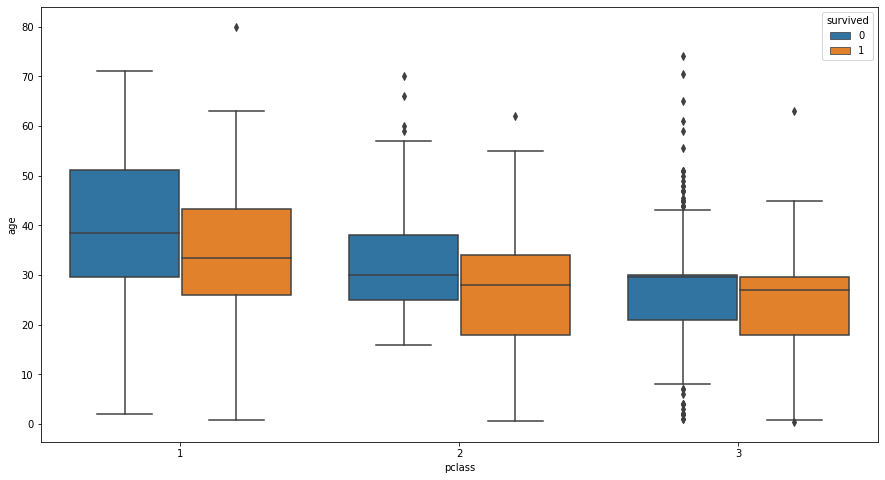

In [59]:
sns.boxplot(data = ti,
            x ='pclass',
            y='age', 
            hue='survived')


## How do I create a violin plot for multiple columns?

A violin plot can show multiple distributions, each a subset of a single column, factored (or grouped) by another.

<AxesSubplot:xlabel='survived', ylabel='age'>

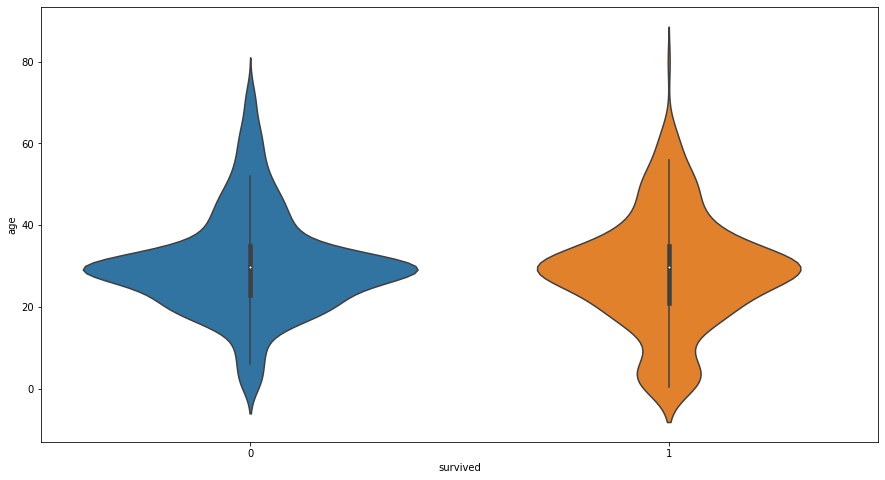

In [60]:
sns.violinplot(data=ti, x='survived', y='age')


<AxesSubplot:xlabel='age', ylabel='embark_town'>

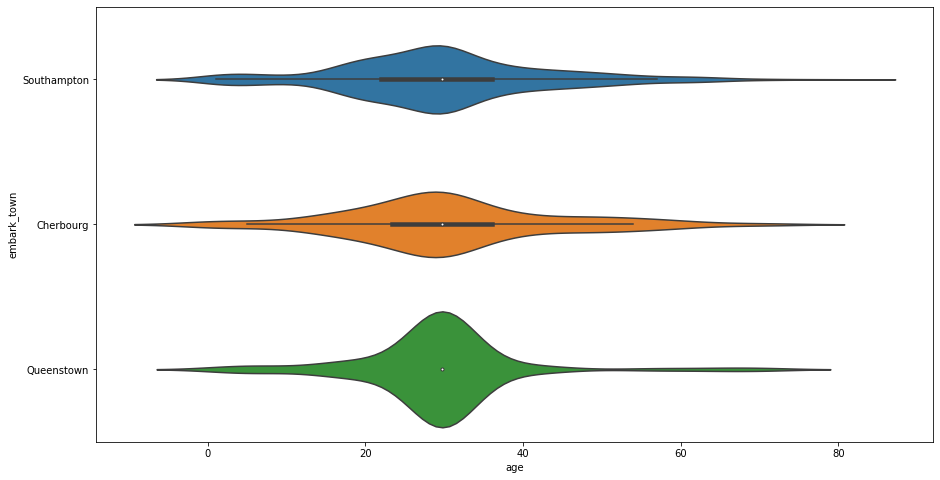

In [61]:
sns.violinplot(data=ti, x="age", y='embark_town')

## How do I create a bar plor for multiple columns?

Bar plots are useful for discrete data or for showing, here, the means:

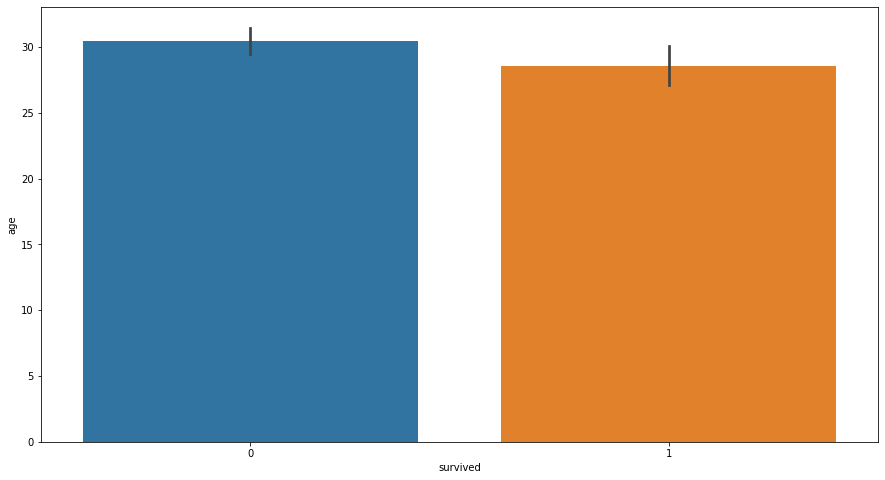

In [62]:
sns.barplot(data=ti, x='survived', y='age');


## How do I create a line plot?

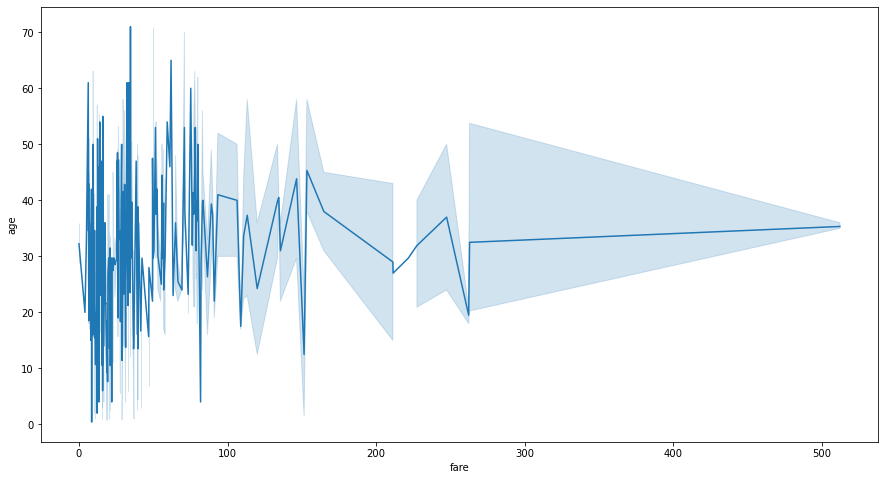

In [63]:
sns.lineplot(data=ti, x='fare', y='age');


###### NB: would creating a scatter plot be more appropriate?

## How do I create a scatter plot?

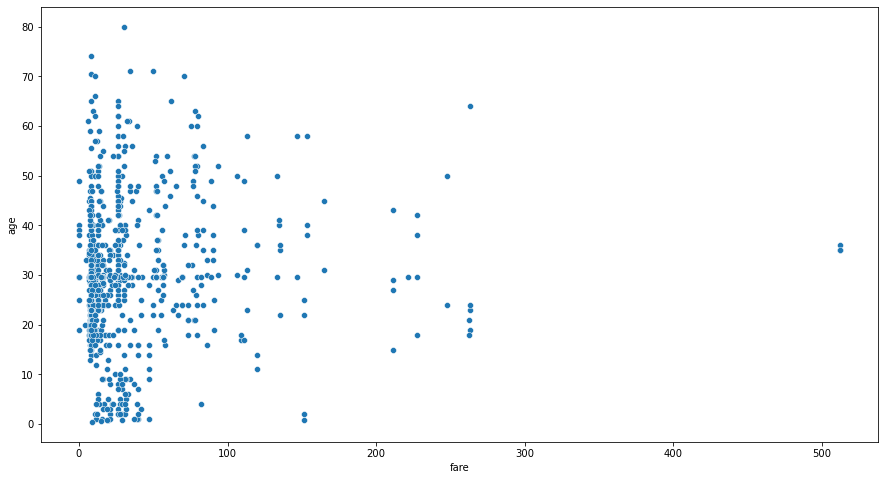

In [64]:
sns.scatterplot(data=ti, x='fare', y='age');


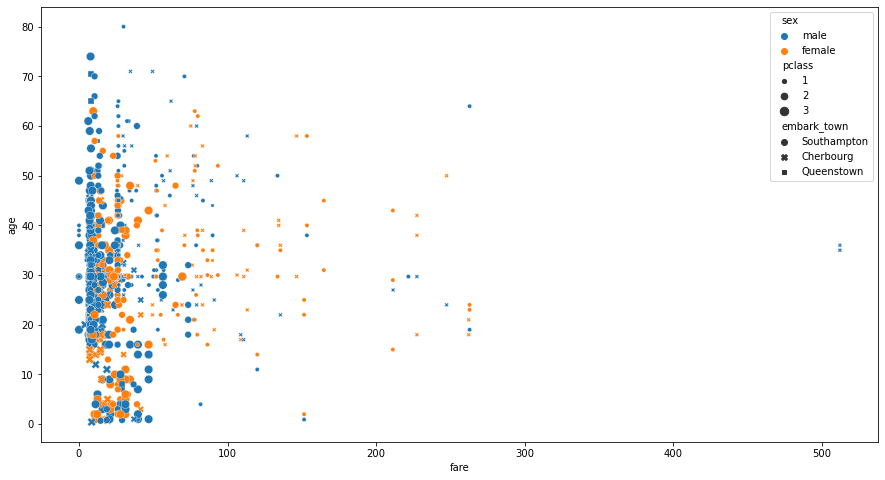

In [65]:
sns.scatterplot(data=ti, 
                x='fare', 
                y='age', 
                hue = 'sex', 
                size = 'pclass',
                style="embark_town");

In [ ]:
ls = []
for name in dir(sns):
    if "plot" in name:
        ls.append(name)

In [ ]:
[name for name in dir(sns) if "plot" in name]

### EXTRA: Tips
* Often for the sake of communication, using Excel is both faster and leads to better visuals
* use `df.to_csv()` to save the data behind a visual
* use Excel to heavily customize the layout (and then, eg., copy powerpoint)

## Exercise (30 min)

## Step 1 (5 min)
* review seaborn individually, try a few plots

## Step 2 (40 min)

* What affected your chances of survival on the Titanic?
    * brainstorm & execute an analysis of the Titanic dataset
* Consider:
    * old vs. young
    * women vs. men
    * women & children vs. men
    * cheaper vs. expensive tickets
    * deck
    * class
    * ...location...
* Use seaborn plots (and pandas) to obtain helpful visuals which answer the investigatory question. 

### Consider:
* Univariate (single-col) plots
    * sns.distplot 
        * of survived
    * sns.violinplot 
        * of fare
    * sns.boxplot
        * of age

* Multivariate (here: 2-col) plots
    * sns.violinplot
        * age by survived
        * fare by survived
    * sns.lineplot
        * fare vs. age
    * sns.scatterplot
        * age vs. fare

`.corr` -> `sns.heatmap()`

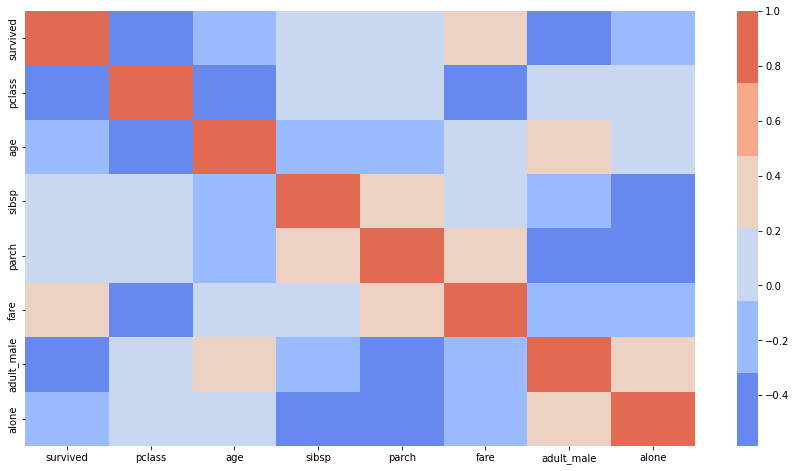

In [69]:
sns.heatmap(ti.corr(), cmap=sns.color_palette('coolwarm'));